In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def pF_rel_cap(cap):
    cap_pF = np.array(cap) * 10**12 #convert to pF
    cap_rel = cap_pF - min(cap_pF) #re-zero
    return cap_pF, cap_rel

def per_cap(cap):
    cap_per = (cap - cap[-1])/cap[0] * 100 #find percentage change
    return cap_per

#FEA results for optimized and triangular capacitances
#Corrected fold angle so this is now xi, not xi/2
fold_angles = [
				20,
				30,
				40,
				50,
				60,
				70,
				80,
				90,
				100,
				110,
				120,
				130,
				140
				]

caps_optimized = [
				0.000000000002114,
				0.0000000000016067,
				0.0000000000013434,
				0.0000000000011795,
				0.0000000000010672,
				0.00000000000098517,
				0.0000000000009219,
				0.00000000000087443,
				0.00000000000082815,
				0.00000000000079552,
				0.00000000000076872,
				0.00000000000074698,
				0.00000000000072345
				]


caps_triangle = [
				0.0000000000071789,
				0.0000000000051951,
				0.0000000000041808,
				0.0000000000035548,
				0.000000000003137,
				0.0000000000028337,
				0.0000000000026053,
				0.0000000000024255,
				0.0000000000022806,
				0.0000000000021629,
				0.0000000000020649,
				0.0000000000019812,
				0.0000000000019044
				]

caps_oc1 = [
				0.0000000000027143,
				0.0000000000020069,
				0.000000000001647,
				0.0000000000014242,
				0.0000000000012751,
				0.0000000000011666,
				0.0000000000010857,
				0.0000000000010191,
				0.00000000000096396,
				0.00000000000091912,
				0.0000000000008827,
				0.00000000000085205,
				0.00000000000082556]

caps_oc2 = [
				0.000000000001327,
				0.0000000000010227,
				0.00000000000087405,
				0.00000000000078152,
				0.00000000000071843,
				0.00000000000067015,
				0.00000000000063563,
				0.00000000000060572,
				0.00000000000058199,
				0.00000000000056314,
				0.00000000000054807,
				0.00000000000053285,
				0.0000000000005212
				]

caps_oc3 = [
				0.0000000000022576,
				0.0000000000016986,
				0.0000000000014065,
				0.0000000000012277,
				0.0000000000011083,
				0.0000000000010219,
				0.00000000000095379,
				0.00000000000089559,
				0.00000000000085354,
				0.00000000000081648,
				0.00000000000079005,
				0.00000000000076356,
				0.00000000000074353
				]

caps_oc4 = [
				0.0000000000011278,
				0.0000000000009054,
				0.00000000000078382,
				0.00000000000071006,
				0.0000000000006576,
				0.00000000000061809,
				0.00000000000058763,
				0.00000000000056312,
				0.00000000000054424,
				0.00000000000052768,
				0.00000000000051376,
				0.00000000000050293,
				0.00000000000049188
				]


In [2]:
caps_optimized_pF, caps_optimized_rel  = pF_rel_cap(caps_optimized)
caps_triangle_pF, caps_triangle_rel  = pF_rel_cap(caps_triangle)
caps_oc1_pF, caps_ic1_rel  = pF_rel_cap(caps_oc1)
caps_oc2_pF, caps_ic2_rel  = pF_rel_cap(caps_oc2)
caps_oc3_pF, caps_ic3_rel  = pF_rel_cap(caps_oc3)
caps_oc4_pF, caps_ic4_rel  = pF_rel_cap(caps_oc4)

delta_caps_oc1 = per_cap(caps_oc1_pF)
delta_caps_oc2 = per_cap(caps_oc2_pF)
delta_caps_oc3 = per_cap(caps_oc3_pF)
delta_caps_oc4 = per_cap(caps_oc4_pF)
delta_caps_optimized = per_cap(caps_optimized_pF)
delta_caps_triangle = per_cap(caps_triangle_pF)

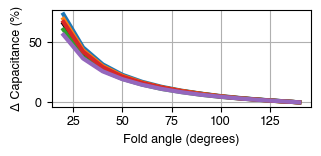

In [3]:
output_figure_name = 'optimizedFEA_nolegend.png'

plt.figure(figsize=(3.25,1.6),facecolor=(1, 1, 1),tight_layout=True)

### PARSES plot style. Please don't adjust unless you don't want to be stylish!
#Font sizes for axis labels, annotations, etc.
SMALL_SIZE = 8
MEDIUM_SIZE = 9

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans','Lucida Grande', 'Verdana']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.grid('True')

lw = 3

### END PARSES plot style

index = 0

plt.plot(fold_angles, delta_caps_triangle, linewidth=lw)
plt.plot(fold_angles, delta_caps_optimized, 'k', linewidth=lw)

plt.plot(fold_angles, delta_caps_oc1, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc2, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc3, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc4, linewidth=lw)

plt.xlabel('Fold angle (degrees)')
plt.ylabel('Δ Capacitance (%)')

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.savefig(output_figure_name, dpi = 600.0, format='png', metadata=None,
        bbox_inches=None, 
        facecolor='auto', edgecolor='auto', transparent=False,
        backend=None)

plt.show()

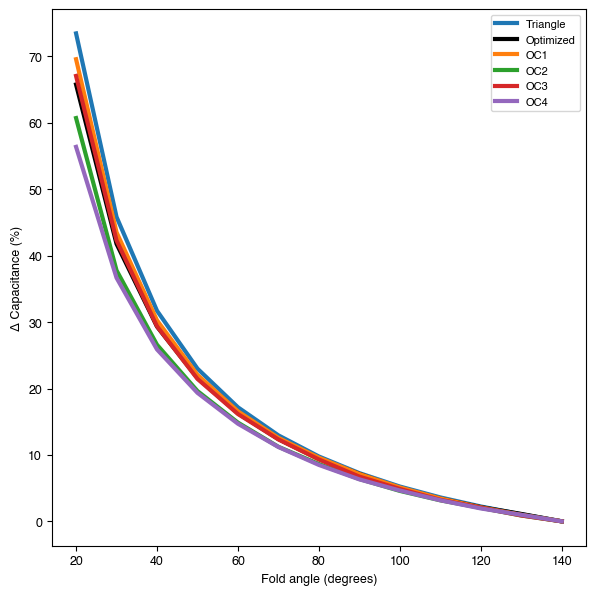

In [4]:
output_figure_name = 'optimizedFEA_yeslegend.png'

plt.figure(figsize=(6,6),facecolor=(1, 1, 1),tight_layout=True)

### PARSES plot style. Please don't adjust unless you don't want to be stylish!
#Font sizes for axis labels, annotations, etc.
SMALL_SIZE = 8
MEDIUM_SIZE = 9

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans','Lucida Grande', 'Verdana']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

lw = 3

### END PARSES plot style

index = 0

plt.plot(fold_angles, delta_caps_triangle, linewidth=lw)
plt.plot(fold_angles, delta_caps_optimized, 'k', linewidth=lw)

plt.plot(fold_angles, delta_caps_oc1, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc2, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc3, linewidth=lw)
plt.plot(fold_angles, delta_caps_oc4, linewidth=lw)

plt.xlabel('Fold angle (degrees)')
plt.ylabel('Δ Capacitance (%)')
plt.legend(['Triangle', 'Optimized', 'OC1', 'OC2', 'OC3', 'OC4'],loc='best')

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.savefig(output_figure_name, dpi = 600.0, format='png', metadata=None,
        bbox_inches=None, 
        facecolor='auto', edgecolor='auto', transparent=False,
        backend=None)

plt.show()

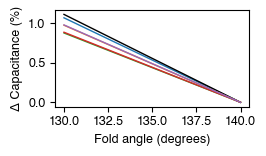

In [5]:
#Plot just smallest change at largest angle
output_figure_name = 'optimizedFEA_inset.png'
plt.figure(figsize=(2.7,1.6),facecolor=(1, 1, 1),tight_layout=True)

index = 11
lw = 1

plt.plot(fold_angles[index:], delta_caps_triangle[index:], linewidth=lw)
plt.plot(fold_angles[index:], delta_caps_optimized[index:], 'k', linewidth=lw)
plt.plot(fold_angles[index:], delta_caps_oc1[index:], linewidth=lw)
plt.plot(fold_angles[index:], delta_caps_oc2[index:], linewidth=lw)
plt.plot(fold_angles[index:], delta_caps_oc3[index:], linewidth=lw)
plt.plot(fold_angles[index:], delta_caps_oc4[index:], linewidth=lw)

plt.xlabel('Fold angle (degrees)')
plt.ylabel('Δ Capacitance (%)')

plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.savefig(output_figure_name, dpi=600.0, format='png', metadata=None,
        bbox_inches=None, 
        facecolor='auto', edgecolor='auto', transparent=False,
        backend=None)

plt.show()